In [77]:
import sys
sys.path.append('../../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr, fit_gaussian, find_ideal_R,most_common_value
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
#from pipython.datarectools import getservotime
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [2]:
pip install -r ../../../requirements.txt

In [3]:
pip install git+https://github.com/wusche1/SpectralMechanicsAnalysis.git

  Cloning https://github.com/wusche1/SpectralMechanicsAnalysis.git to c:\users\jschulz\appdata\local\temp\pip-req-build-yww0rg6f
  Resolved https://github.com/wusche1/SpectralMechanicsAnalysis.git to commit 3f37f0cd586ec35a72978dc4e948657458efd435
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/wusche1/SpectralMechanicsAnalysis.git 'C:\Users\jschulz\AppData\Local\Temp\pip-req-build-yww0rg6f'


In [78]:
from SpectralMechanicsAnalysis import Data, mean_back_realxation, mean_back_relaxation_multiple_trajectories, mean_back_relaxation_multiple_trajectories_with_timestamps, mean_back_relaxation_multiple_trajectories_with_timestamps

In [79]:
def trajectory_folders_from_datapath(datapath):
    list_of_subfolders = [f.path for f in os.scandir(datapath) if f.is_dir()]
    return [os.path.join(datapath,subfolder) for subfolder in list_of_subfolders]

data_path = r'\\134.76.13.158\betzlab\Julian\cell_beats\01_03_24\sample_1'
trajectory_folders = trajectory_folders_from_datapath(data_path)

In [9]:
tra_corr_1 = np.load(os.path.join(trajectory_folders[0],'tra_corr.npy'))
tra_mean_1 = np.load(os.path.join(trajectory_folders[0],'tra_mean.npy'))


In [80]:
dt = 1/1000
x_data = tra_mean_1[:,0]
y_data = tra_mean_1[:,1]
t_data = np.arange(0, len(x_data)*dt, dt)
x_dataset = Data(t_data, x_data, log_weighted = True, unweighted_postfit = True)
y_dataset = Data(t_data, y_data, log_weighted = True, unweighted_postfit = True)

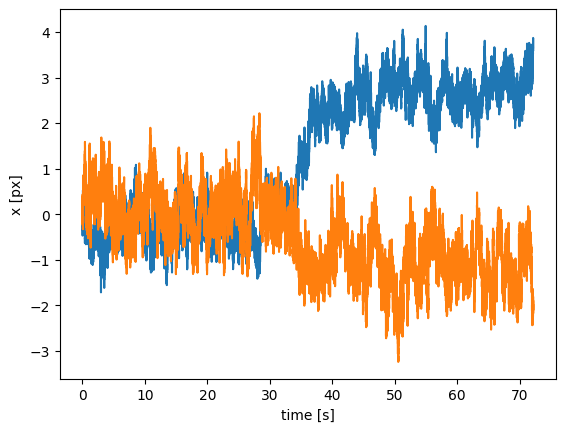

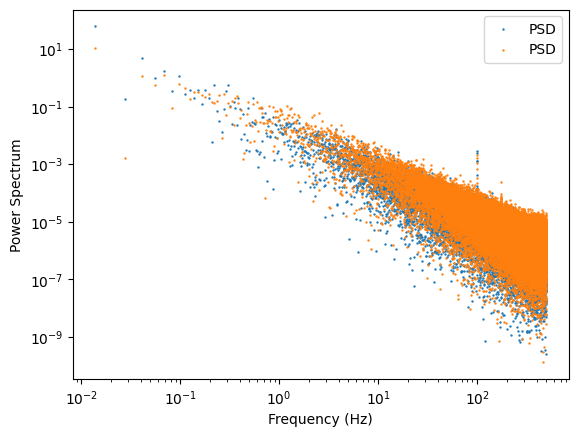

In [81]:
plt.plot(t_data, x_data)
plt.plot(t_data, y_data)
plt.xlabel('time [s]')
plt.ylabel('x [px]')
plt.show()
x_dataset.plot_psd()
y_dataset.plot_psd()

In [82]:
x_dataset.bayesian_update()
y_dataset.bayesian_update()

c:\Users\jschulz\Desktop\Git_file\mbr_relevant_code\.venv\Lib\site-packages\SpectralMechanicsAnalysis\analyze_data.py:36: RuntimeWarning: invalid value encountered in log
  Loss = y_data / y_model + np.log(y_model)


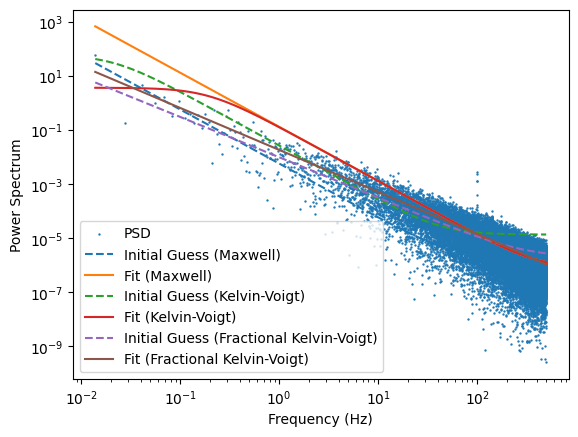

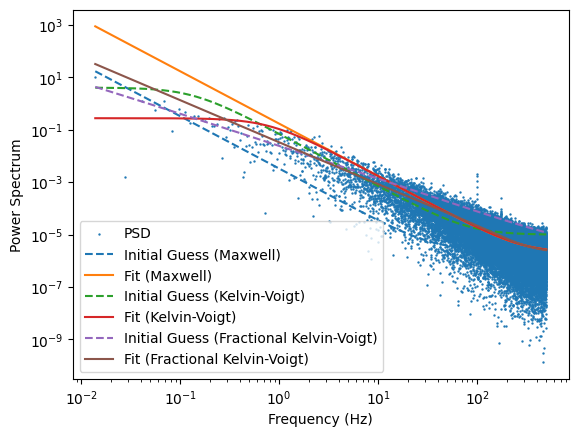

In [83]:
x_dataset.plot_psd()
plt.show()
y_dataset.plot_psd()
plt.show()


In [84]:

print("x_data")
print(f"posterior maxwell:{x_dataset.posterior_maxwell}")    
print(f"posterior kelvin voigt:{x_dataset.posterior_kelvin_voigt}")
print(f"posterior fractional kelvin voigt:{x_dataset.posterior_fractional_kelvin_voigt}")

print("y_data")
print(f"posterior maxwell:{y_dataset.posterior_maxwell}")
print(f"posterior kelvin voigt:{y_dataset.posterior_kelvin_voigt}")
print(f"posterior fractional kelvin voigt:{y_dataset.posterior_fractional_kelvin_voigt}")



x_data
posterior maxwell:0.0
posterior kelvin voigt:0.0
posterior fractional kelvin voigt:1.0
y_data
posterior maxwell:7.073298792906292e-247
posterior kelvin voigt:8.111348462334036e-213
posterior fractional kelvin voigt:1.0


In [85]:
x_dataset.peaks = []
x_dataset.max_peak_percentage = 0.8
x_dataset.find_peaks(max_iter=5)

y_dataset.peaks = []
y_dataset.max_peak_percentage = 0.8
y_dataset.find_peaks(max_iter=5)

In [86]:
x_dataset.create_reconstructed_data()
y_dataset.create_reconstructed_data()

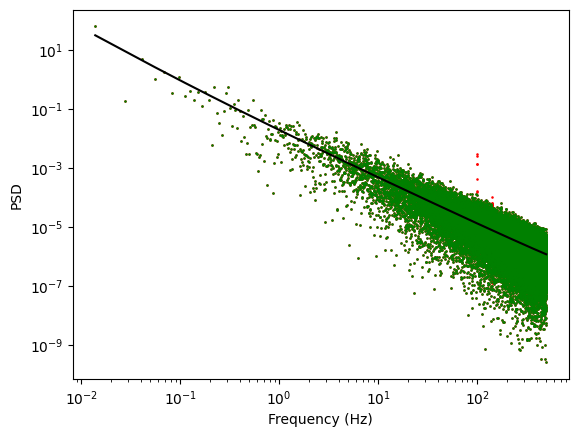

In [87]:
frequencies = x_dataset.frequencies
PSD = x_dataset.PSD
plt.scatter(frequencies, PSD, s=.7,c='r')
plt.scatter(frequencies, x_dataset.reconstructed_PSD, c='green', s=.7)
plt.plot(frequencies, x_dataset.fit_function(frequencies, x_dataset.fit_params), c='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()


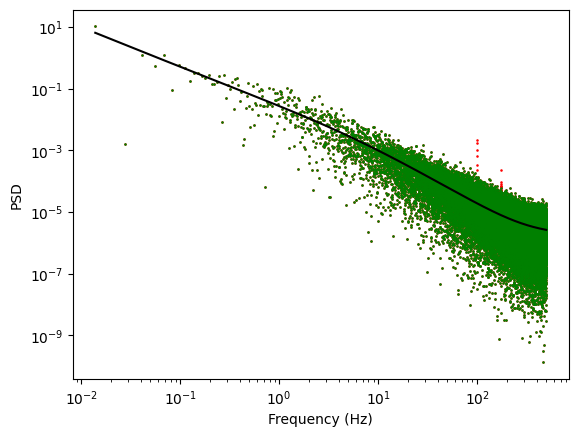

In [88]:
frequencies = y_dataset.frequencies
PSD = y_dataset.PSD
plt.scatter(frequencies, PSD, s=.7,c='r')
plt.scatter(frequencies, y_dataset.reconstructed_PSD, c='green', s=.7)
plt.plot(frequencies, y_dataset.fit_function(frequencies, y_dataset.fit_params), c='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()

In [89]:
x_dataset.fit_fractional_kelvin_voigt

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -401075.82344745763
             x: [ 1.937e+02 -1.126e+02  5.504e-01  5.504e-01 -1.626e-07]
           nit: 395
          nfev: 652
 final_simplex: (array([[ 1.937e+02, -1.126e+02, ...,  5.504e-01,
                        -1.626e-07],
                       [ 1.937e+02, -1.126e+02, ...,  5.504e-01,
                        -1.626e-07],
                       ...,
                       [ 1.937e+02, -1.126e+02, ...,  5.504e-01,
                        -1.626e-07],
                       [ 1.937e+02, -1.126e+02, ...,  5.504e-01,
                        -1.626e-07]]), array([-4.011e+05, -4.011e+05, -4.011e+05, -4.011e+05,
                       -4.011e+05, -4.011e+05]))

In [106]:
Tau_list = dt*np.array([1,2,5,10,20,50,100,200,500]) 
T_MBR = dt *1000*1
multiplier = 1
t_mbr = np.arange(0, T_MBR, dt)
cleaned_mbr_list = []
original_mbr_list = []
for Tau in Tau_list:
    cleaned_mbr = mean_back_realxation(dt,x_dataset.reconstructed_x, Tau, T_MBR, multiplier = multiplier)
    original_mbr = mean_back_realxation(dt,x_data, Tau, T_MBR, multiplier = multiplier)
    cleaned_mbr_list.append(cleaned_mbr)
    original_mbr_list.append(original_mbr)
#mbr = mean_back_realxation(dt,x_data, Tau, T_MBR, multiplier = multiplier)
#cleaned_mbr =mean_back_realxation(dt,x_dataset.reconstructed_x, Tau, T_MBR, multiplier = multiplier)

100%|██████████| 21931/21931 [00:00<00:00, 214827.53it/s]


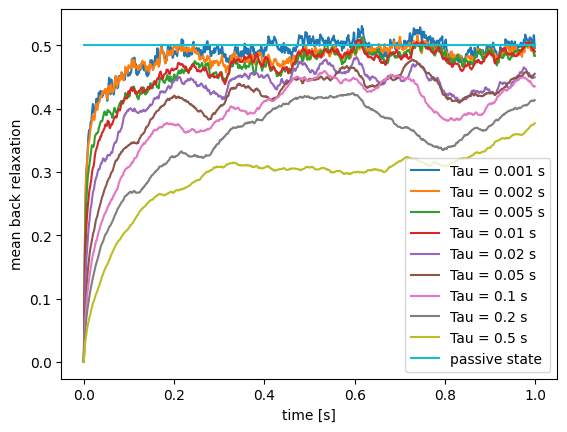

In [107]:
for tau, mbr in zip(Tau_list, cleaned_mbr_list):
    plt.plot(t_mbr, mbr, label = f'Tau = {tau} s')
plt.plot(t_mbr, np.ones_like(t_mbr)*.5, label = 'passive state')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('mean back relaxation')
plt.show()


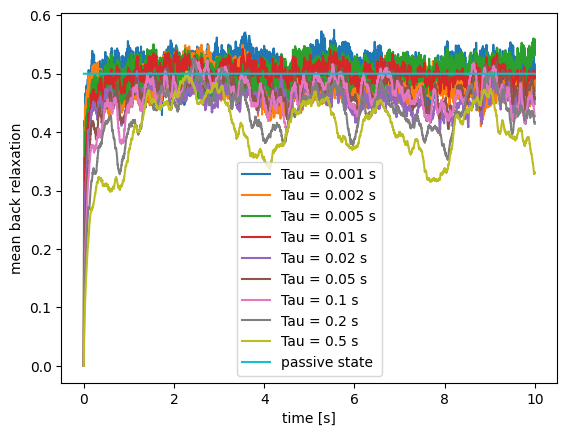

In [103]:
for tau, mbr in zip(Tau_list, original_mbr_list):
    plt.plot(t_mbr, mbr, label = f'Tau = {tau} s')
plt.plot(t_mbr, np.ones_like(t_mbr)*.5, label = 'passive state')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('mean back relaxation')
plt.show()

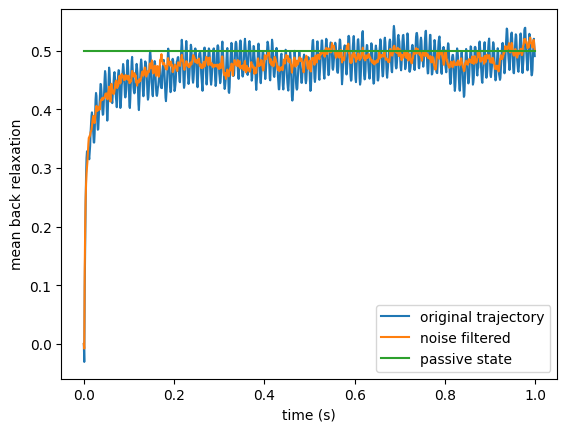

In [52]:
plt.plot(t_mbr, mbr, label = 'original trajectory')
plt.plot(t_mbr, cleaned_mbr, label = 'noise filtered')
plt.plot(t_mbr, np.ones_like(t_mbr)*.5, label = 'passive state')
plt.xlabel('time (s)')
plt.ylabel('mean back relaxation')
plt.legend()
plt.show()

In [1]:
np.min(PSD[:0])

NameError: name 'np' is not defined

In [99]:
PSD
min_PSD_up_to = np.minimum.accumulate(PSD)

In [107]:
p = 0.01
def calculate_x_p(p,x_l):
    n = np.arange(1, len(x_l)+1)
    return (2*(p)**3-1)*x_l

x_p = calculate_x_p(p,min_PSD_up_to)

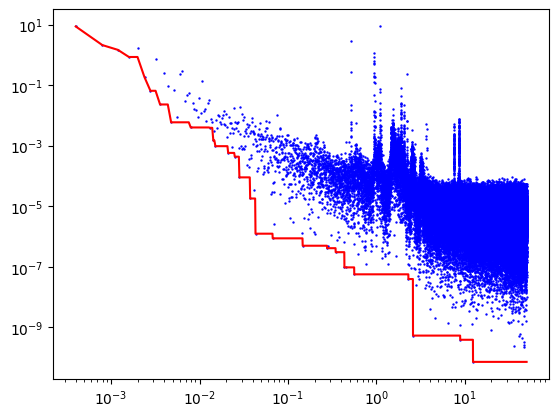

In [108]:
plt.scatter(frequencies,PSD, s=.5, c='b')
plt.plot(frequencies, min_PSD_up_to, c='r')
plt.plot(frequencies, x_p, c='g')
plt.xscale('log')
plt.yscale('log')